# PyCBC Inference: A Python-based parameter estimation toolkit for compact-object merger signals

**C. M. Biwer<sup>1,2</sup>, Collin D. Capano<sup>3</sup>, Soumi De<sup>2</sup>, Miriam Cabero<sup>3</sup>, Duncan A. Brown<sup>2</sup>, Alexander H. Nitz<sup>3</sup>, V. Raymond<sup>4,5</sup>**

**<sup>1</sup>Los Alamos National Laboratory, Los Alamos, NM 87545, USA**

**<sup>2</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>3</sup>Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany**

**<sup>4</sup>Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-14476 Potsdam, Germany**

**<sup>5</sup>School of Physics and Astronomy, Cardiff University, Cardiff, CF243AA, Wales, UK**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

The contents in this repository is a companion to the paper posted at [arXiv:1807.10312](https://arxiv.org/abs/1807.10312). We release posterior probability density files from the MCMC from running PyCBC inference on the gravitational-wave data for the binary black hole events GW150914, GW151226, and LVT151012, detected during LIGO's first observing run. We provide a notebook to demonstrate how to read these posterior files and reconstruct figures 4, 5 and 6 in the paper. We also provide the ini files and sample scripts with command lines to run the PyCBC inference parameter estimation analysis on the gravitational-wave data for the three events.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:
```
@article{Biwer:2018,
      author         = "Biwer, C. M. and Capano, Collin D. and De, Soumi and
                        Cabero, Miriam and Brown, Duncan A. and Nitz, Alexander H. and Raymond, V.",
      title          = "{PyCBC Inference: A Python-based parameter estimation toolkit for compact-object merger signals}",
      year           = "2018",
      eprint         = "1807.10312",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.IM",
      SLACcitation   = "%%CITATION = ARXIV:1807.10312;%%"
}
```

The posterior samples from the PyCBC Inference analyses of GW150914, LVT151012, and GW151226 presented in the paper are stored in the folders ``posteriors/GW150914``, ``posteriors/LVT151012``, and ``posteriors/GW151226`` respectively in the files mentioned below. The data in these files contain the thinned posterior samples from the MCMC chains used to produce the posterior probability density and histogram plots :

 1. [gw150914_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/gw150914_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of GW150914.
 2. [gw151226_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/gw151226_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of GW151226.
 3. [lvt151012_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/lvt151012_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of LVT151012.


The sample scripts with command lines and configuration files for performing the analyses presented in the paper for GW150914, LVT151012, and GW151226 can be found in the folders ``samples/GW150914``, ``samples/LVT151012``, and ``samples/GW151226`` respectively.

The results for the astrophysical events in the paper were generated with the [PyCBC v1.9.4 release.](https://github.com/gwastro/pycbc/releases/tag/v1.9.4)

## Running this notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.9.4
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.9.4 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/gwastro/pycbc-inference-paper.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `pycbc-inference-paper` in the cloned git repository and open [data_release_pycbc-inference-paper_companion.ipynb](https://github.com/gwastro/pycbc-inference-paper/blob/master/data_release_pycbc-inference-paper_companion.ipynb) (this notebook).

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pycbc.io.inference_hdf import InferenceFile
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 16

The data files store posteriors for the variable parameters ( `variable_args` ) in the MCMC. To check the parameter names that are stored in the posteriors file from the analysis of any of the events (say GW150914), use the appropriate file and do :

In [2]:
fp = h5py.File("posteriors/GW150914/gw150914_posteriors_thinned.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'mass1' 'mass2' 'spin1_a' 'spin1_azimuthal' 'spin1_polar' 'spin2_a'
 'spin2_azimuthal' 'spin2_polar' 'distance' 'coa_phase' 'inclination'
 'polarization' 'ra' 'dec']


Posteriors for the `variable_args` are stored inside the `samples` group of the hdf data files. PyCBC provides a handler class `pycbc.io.InferenceFile` that extends `h5py.File`. To read the output file and get samples for any of the `variable_args`, say `mass1`, do :

In [3]:
fp = InferenceFile("posteriors/GW150914/gw150914_posteriors_thinned.hdf", "r")
mass1_samples = fp['samples/mass1'][:]
print mass1_samples

[37.4110177  38.82097953 37.5441059  ... 38.26798963 37.69696687
 43.4148585 ]


Using the PyCBC software, one can map the posteriors for the `variable_args` to posteriors of other parameters. PyCBC has several functions that can be used to do the general transforms between parameters. You can look in `pycbc.conversions`, `pycbc.coordinates`, `pycbc.cosmology` for the possible transforms that you can do with the available `variable_args`. For example, to obtain the the chirp mass of the binary `mchirp` from the component masses `(mass1, mass2)` one would do :

In [4]:
from pycbc import conversions

fp=InferenceFile("posteriors/GW150914/gw150914_posteriors_thinned.hdf",'r')
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
fp.close()

mchirp = conversions.mchirp_from_mass1_mass2(mass1, mass2)
print mchirp

[31.85900585 32.0278595  31.72960997 ... 31.30123455 31.09496007
 31.44016059]


PyCBC has some common transforms pre-defined in the code, which can be used to derive some of the standard parameters from the `variable_args` parameters in the data file. For example, `( mass1, mass2 )` present in `variable_args` can be used to obtain derived parameters such as `mchirp` and `q`. The parameters whose posteriors are plotted below include some of such derived parameters. 

## To plot Fig. 4 of the paper : GW150914 posteriors

Below are examples that will plot posteriors from the PyCBC Inference analysis of GW150914 presented in subfigures (a), (b) and (c) of figure 4 in the paper. To plot the posteriors, we use a built-in plotting script provided by PyCBC Inference that handles formatting and any necessary parameter conversions. Some formatting differences may be present, but if you're running a development version of PyCBC then you can adjust these as desired in the plotting code.

### Fig 4a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

In [5]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW150914/gw150914_posteriors_thinned.hdf \
    --output-file m1m2source_gw150914.png \
    --plot-density \
    --density-cmap Purples \
    --z-arg logplr \
    --plot-contours \
    --contour-color purple \
    --plot-marginal \
    --parameters "mass1/(1+redshift):\$m_1^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
                 "mass2/(1+redshift):\$m_2^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
    --maxs "mass1/(1+redshift):50" \
           "mass2/(1+redshift):38" \
    --mins "mass1/(1+redshift):27" \
           "mass2/(1+redshift):20"        

2018-07-22 16:35:16,675 Loading parameters
2018-07-22 16:35:16,676 Reading input file posteriors/GW150914/gw150914_posteriors_thinned.hdf
2018-07-22 16:35:16,678 Loading samples
2018-07-22 16:35:16,694 Getting likelihood stats
2018-07-22 16:35:16,702 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/lig

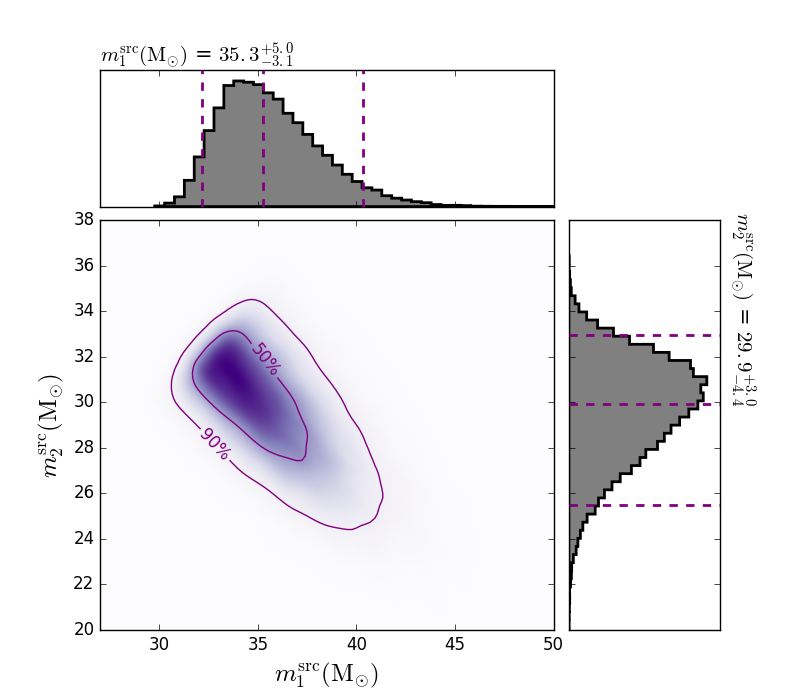

In [6]:
Image('m1m2source_gw150914.png')

### Fig 4b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [7]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW150914/gw150914_posteriors_thinned.hdf \
    --output-file q_chieff_gw150914.png \
    --plot-density \
    --density-cmap Purples \
    --z-arg logplr \
    --plot-contours \
    --contour-color purple \
    --plot-marginal \
    --parameters q chi_eff \
    --maxs q:2

2018-07-22 16:20:41,525 Loading parameters
2018-07-22 16:20:41,526 Reading input file posteriors/GW150914/gw150914_posteriors_thinned.hdf
2018-07-22 16:20:41,528 Loading samples
2018-07-22 16:20:41,680 Getting likelihood stats
2018-07-22 16:20:41,684 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/lig

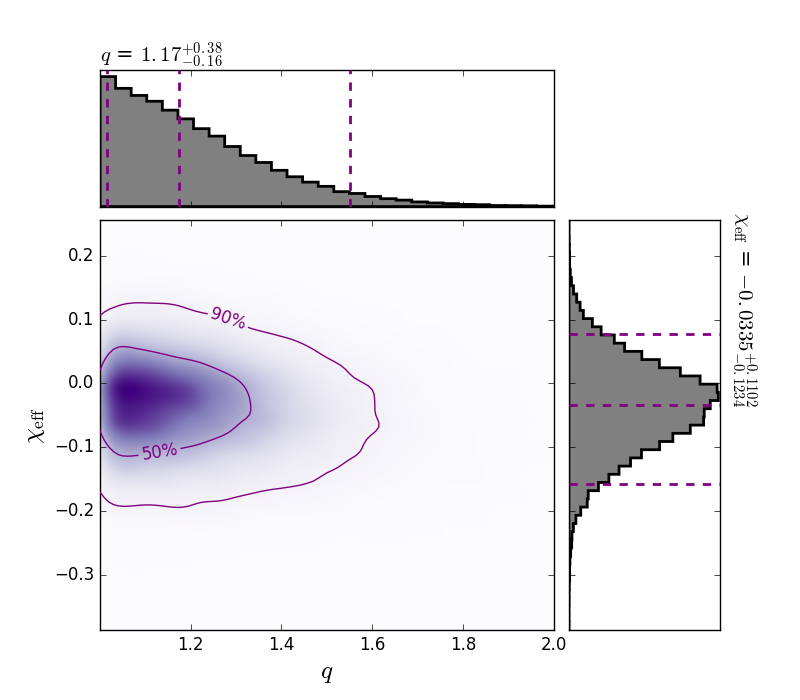

In [8]:
Image('q_chieff_gw150914.png')

### Fig 4c : posterior density plot for $\iota - d_L$

In [9]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW150914/gw150914_posteriors_thinned.hdf \
    --output-file iota_dl_gw150914.png \
    --plot-density \
    --density-cmap Purples \
    --z-arg logplr \
    --plot-contours \
    --contour-color purple \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180" \

2018-07-22 16:21:36,323 Loading parameters
2018-07-22 16:21:36,323 Reading input file posteriors/GW150914/gw150914_posteriors_thinned.hdf
2018-07-22 16:21:36,326 Loading samples
2018-07-22 16:21:36,333 Getting likelihood stats
2018-07-22 16:21:36,339 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/lig

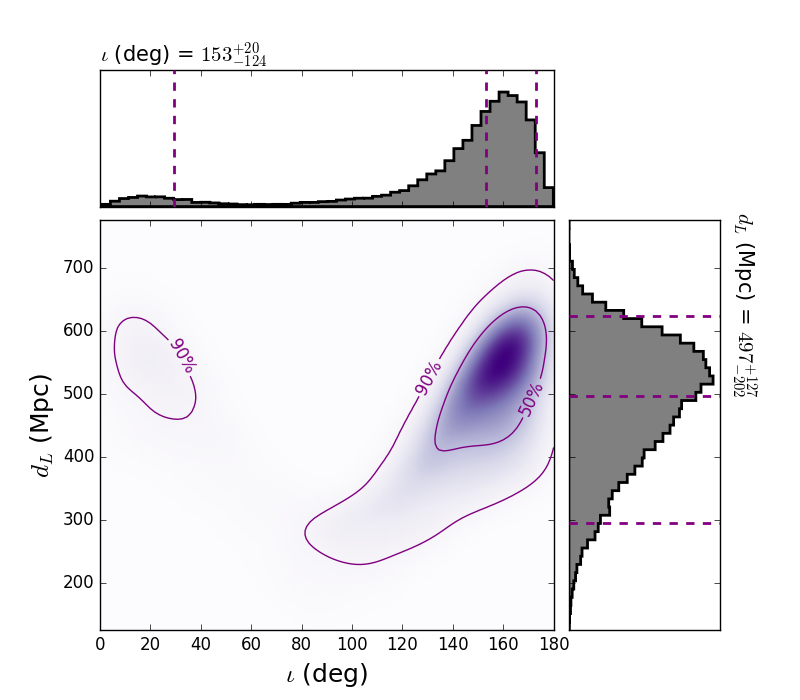

In [10]:
Image('iota_dl_gw150914.png')

## To plot Fig. 5 of the paper : GW151226 posteriors

Below are examples that will plot posteriors from the PyCBC Inference analysis of GW151226 presented in subfigures (a), (b) and (c) of figure 5 in the paper using the same built-in PyCBC Inference plotting script as used for GW150914 above.

### Fig 5a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

In [11]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW151226/gw151226_posteriors_thinned.hdf \
    --output-file m1m2source_gw151226.png \
    --plot-density \
    --density-cmap Oranges \
    --z-arg logplr \
    --plot-contours \
    --contour-color brown \
    --plot-marginal \
    --parameters "mass1/(1+redshift):\$m_1^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
                 "mass2/(1+redshift):\$m_2^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
    --maxs "mass1/(1+redshift):30"

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:08:01,852 Loading parameters
2018-07-22 16:08:01,852 Reading input file posteriors/GW151226/gw151226_posteriors_thinned.hdf
2018-07-22 16:08:01,853 Loading samples
2018-07-22 16:08:01,866 Getting likelihood stats
2018-07-22 16:08:01,870 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasi

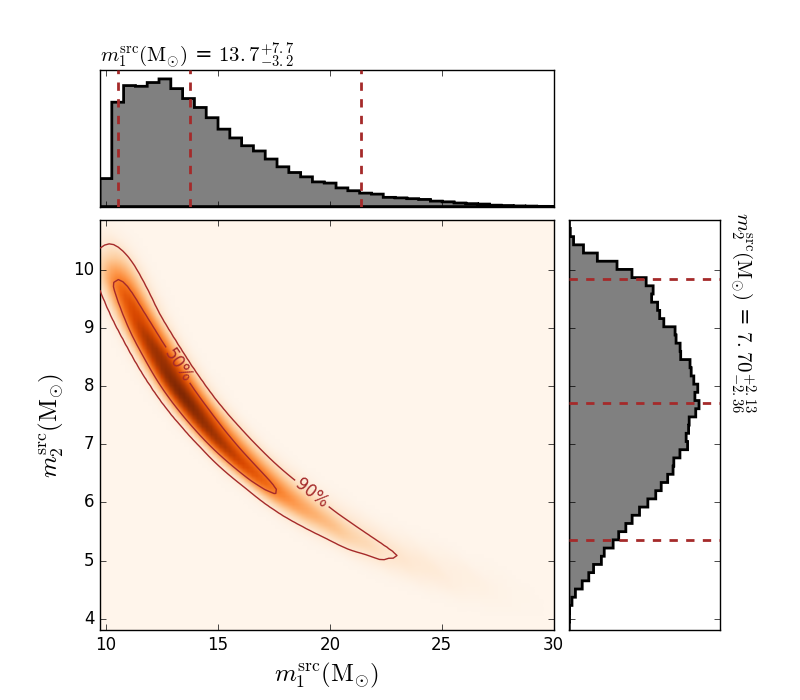

In [12]:
Image('m1m2source_gw151226.png')

### Fig 5b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [13]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW151226/gw151226_posteriors_thinned.hdf \
    --output-file q_chieff_gw151226.png \
    --plot-density \
    --density-cmap Oranges \
    --z-arg logplr \
    --plot-contours \
    --contour-color brown \
    --plot-marginal \
    --parameters q chi_eff \
    --maxs q:6 \
           chi_eff:0.5

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:08:54,748 Loading parameters
2018-07-22 16:08:54,748 Reading input file posteriors/GW151226/gw151226_posteriors_thinned.hdf
2018-07-22 16:08:54,750 Loading samples
2018-07-22 16:08:54,895 Getting likelihood stats
2018-07-22 16:08:54,898 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasi

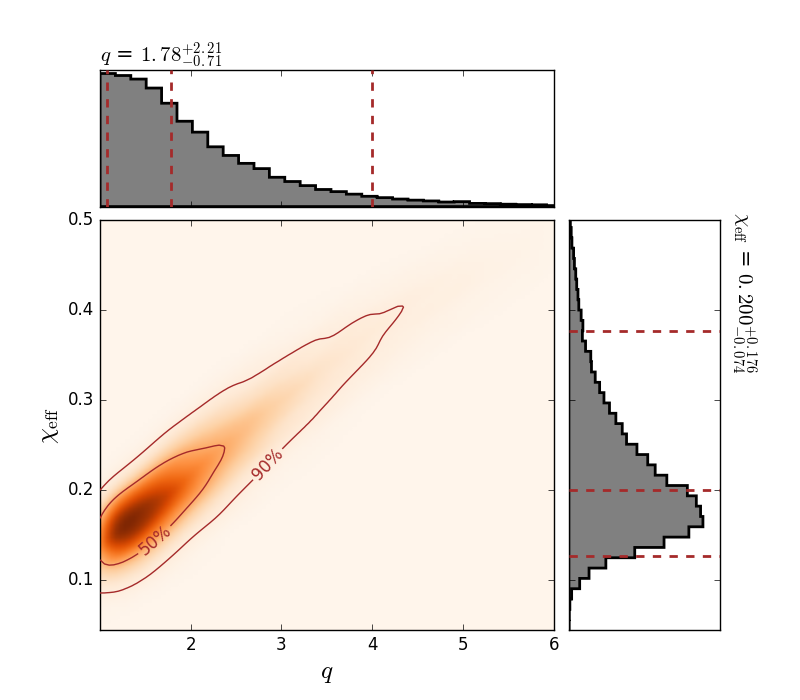

In [14]:
Image('q_chieff_gw151226.png')

### Fig 5c : posterior density plot for $\iota - d_L$

In [15]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW151226/gw151226_posteriors_thinned.hdf \
    --output-file iota_dl_gw151226.png \
    --plot-density \
    --density-cmap Oranges \
    --z-arg logplr \
    --plot-contours \
    --contour-color brown \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180"

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:09:35,334 Loading parameters
2018-07-22 16:09:35,334 Reading input file posteriors/GW151226/gw151226_posteriors_thinned.hdf
2018-07-22 16:09:35,336 Loading samples
2018-07-22 16:09:35,340 Getting likelihood stats
2018-07-22 16:09:35,343 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasi

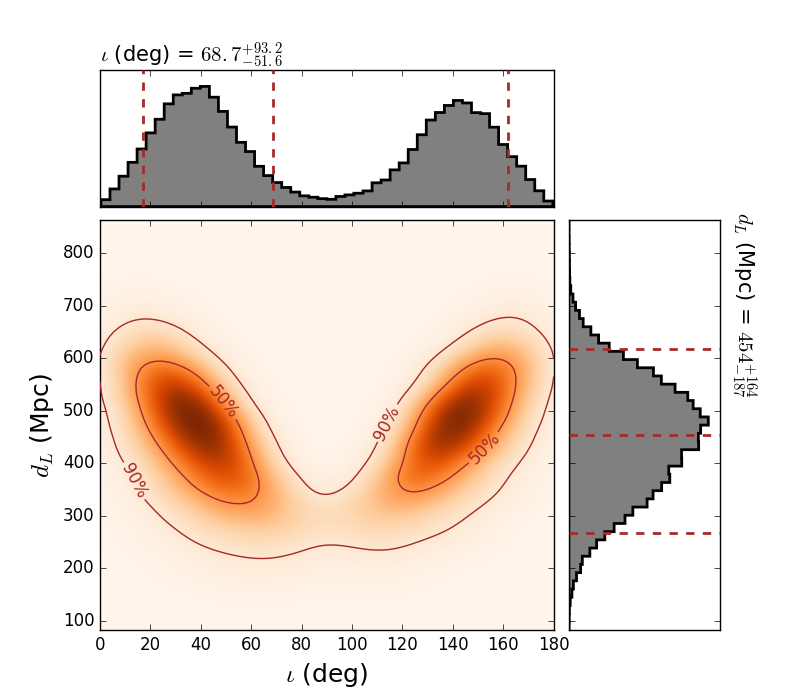

In [16]:
Image('iota_dl_gw151226.png')

## To plot Fig. 6 of the paper : LVT151012 posteriors

Below are examples that will plot posteriors from the PyCBC Inference analysis of LVT151012 presented in subfigures (a), (b) and (c) of figure 6 in the paper using the same built-in PyCBC Inference plotting script as used for GW150914 above.

### Fig 6a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

In [17]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf \
    --output-file m1m2source_lvt151012.png \
    --plot-density \
    --density-cmap Greens \
    --z-arg logplr \
    --plot-contours \
    --contour-color darkgreen \
    --plot-marginal \
    --parameters "mass1/(1+redshift):\$m_1^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
                 "mass2/(1+redshift):\$m_2^{\mathrm{src}}    (\mathrm{M}_{\odot})$" \
    --maxs "mass1/(1+redshift)":50

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:10:33,430 Loading parameters
2018-07-22 16:10:33,430 Reading input file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf
2018-07-22 16:10:33,432 Loading samples
2018-07-22 16:10:33,444 Getting likelihood stats
2018-07-22 16:10:33,448 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oa

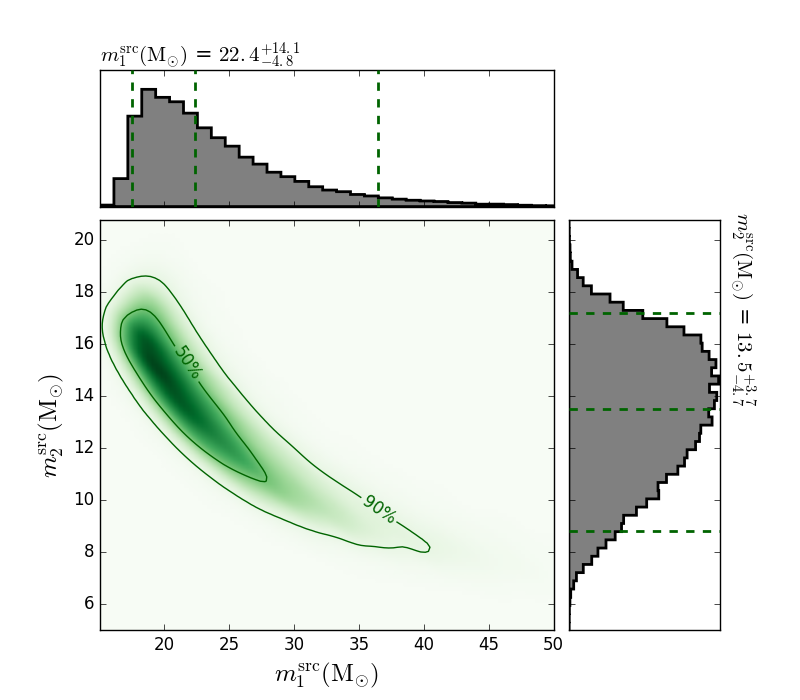

In [18]:
Image('m1m2source_lvt151012.png')

### Fig 6b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [19]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf \
    --output-file q_chieff_lvt151012.png \
    --plot-density \
    --density-cmap Greens \
    --z-arg logplr \
    --plot-contours \
    --contour-color darkgreen \
    --plot-marginal \
    --parameters q chi_eff \
    --maxs q:6

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:11:23,464 Loading parameters
2018-07-22 16:11:23,464 Reading input file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf
2018-07-22 16:11:23,466 Loading samples
2018-07-22 16:11:23,618 Getting likelihood stats
2018-07-22 16:11:23,621 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oa

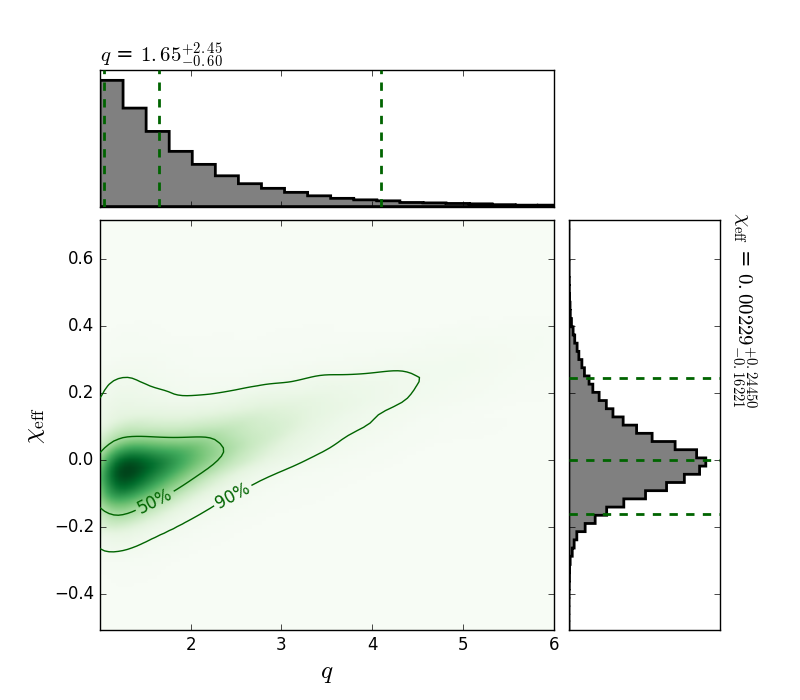

In [21]:
Image('q_chieff_lvt151012.png')

### Fig 6c : posterior density plot for $\iota - d_L$

In [22]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf \
    --output-file iota_dl_lvt151012.png \
    --plot-density \
    --density-cmap Greens \
    --z-arg logplr \
    --plot-contours \
    --contour-color darkgreen \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180"

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:12:21,961 Loading parameters
2018-07-22 16:12:21,961 Reading input file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf
2018-07-22 16:12:21,963 Loading samples
2018-07-22 16:12:21,969 Getting likelihood stats
2018-07-22 16:12:21,973 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oa

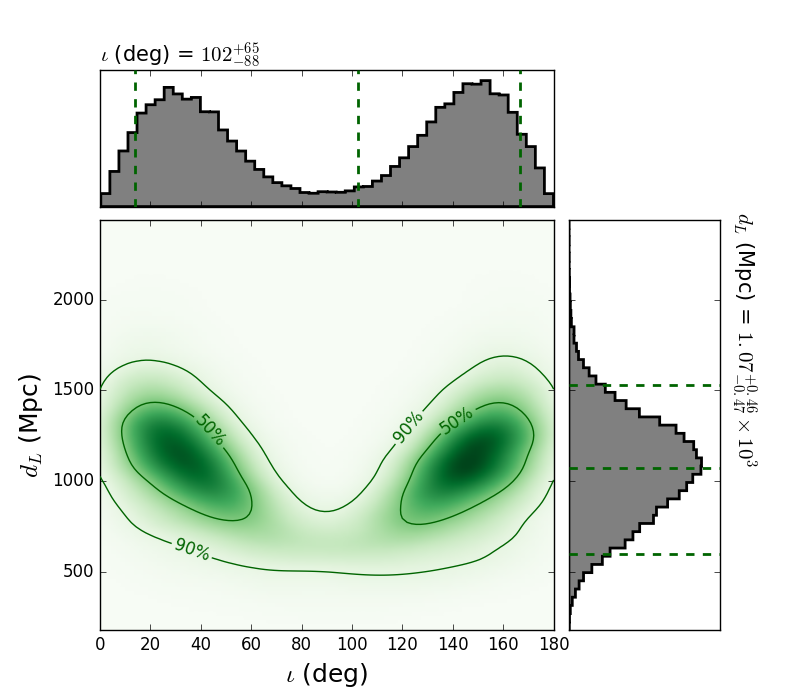

In [23]:
Image('iota_dl_lvt151012.png')

## Funding

This work was supported by NSF awards PHY-1404395 (DAB, CMB), PHY-1707954 (DAB, SD), and PHY-1607169 (SD). Computations were supported by Syracuse University and NSF award OAC-1541396. We also acknowledge the Max Planck Gesellschaft for support and the Atlas cluster computing team at AEI Hannover. The authors thank the LIGO Scientific Collaboration for access to the data and gratefully acknowledge the support of the United States National Science Foundation (NSF) for the construction and operation of the LIGO Laboratory and Advanced LIGO as well as the Science and Technology Facilities Council (STFC) of the United Kingdom, and the Max-Planck-Society (MPS) for support of the construction of Advanced LIGO. Additional support for Advanced LIGO was provided by the Australian Research Council. This research has made use of data obtained from the LIGO Open Science Center (https://losc.ligo.org).